# Business Scenario and Problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to me as a data analytics professional and ask me to provide data-driven suggestions based on your understanding of the data.

My goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If I can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Data Dictionary

The dataset contains 15,000 rows and 10 columns for the variables listed below. 

Source: [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Operational
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [2]:
# Load dataset into a dataframe
data0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
data0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Cleaning

- Understand the variables
- Clean the dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data

# Numeric
data0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Categorical: department
data0['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [6]:
# Categorical: salary
data0['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

### Rename columns

In [7]:
# Display all column names
data0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Changing column names to lower case

# Defining function
def lowercase_column_names(df):
  """
  This function iterates over a DataFrame and converts all column names to lowercase.

  Args:
      df: A pandas DataFrame.

  Returns:
      A new DataFrame with lowercase column names.
  """
  # Get the existing column names
  columns = list(df.columns)

  # Convert all column names to lowercase
  lowercase_columns = [col.lower() for col in columns]

  # Rename the DataFrame columns
  df.columns = lowercase_columns

  return df

# Executing function on data
lowercase_column_names(data0)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [9]:
# Rename columns as needed
data1 = data0.rename(columns = {'satisfaction_level':'satisfaction', 'average_montly_hours':'avg_hours', 
                                'time_spend_company':'tenure', 'promotion_last_5years':'promotion'})


# Display all column names after the update
data1.head()


,satisfaction,last_evaluation,number_project,avg_hours,tenure,work_accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check  for Missing Values

In [10]:
# Check for missing values
data1.isna().sum()

satisfaction       0
last_evaluation    0
number_project     0
avg_hours          0
tenure             0
work_accident      0
left               0
promotion          0
department         0
salary             0
dtype: int64

### Check duplicates

In [11]:
# Check for duplicates
data1.duplicated().sum()


3008

In [12]:
# Inspect some rows containing duplicates as needed
mask = data1.duplicated()
data1[mask]


,satisfaction,last_evaluation,number_project,avg_hours,tenure,work_accident,left,promotion,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Look as though the duplicate data is indeed duplicates, as it is unlikely that all information is truly indentical for over 3000 people. If this was a real world scenario, I would raise questions concerning its collection to get a better idea. For the purposes of this project, I will drop them.

In [13]:
# Drop duplicates and save resulting dataframe in a new variable as needed
data2 = data1.drop_duplicates().copy()

# Display first few rows of new dataframe as needed
data2.shape

(11991, 10)

### Check for Outliers

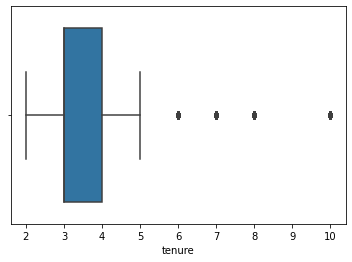

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(data1['tenure'])

In [15]:
# Determine the number of rows containing outliers
mask = data2['tenure'] >= 6
check_tenure = data2[mask]

print(check_tenure['tenure'].value_counts())
print('Total count of employees with tenure >= 6 years:', len(check_tenure))

6     542
10    107
7      94
8      81
Name: tenure, dtype: int64
Total count of employees with tenure >= 6 years: 824


## Data Exploration

Now that the data is clean, I will perform EDA to better understant relationships between the variables.

In [16]:
# Get numbers of people who left vs. stayed
print('1 represents the employee has left.', '\n0 represents the employee is still currently with the company')
print('', '\nCount')
print(data2['left'].value_counts())
print('', '\nPercentage')
# Get percentages of people who left vs. stayed
print(round(data2['left'].value_counts(normalize = True) * 100, 2))


1 represents the employee has left. 
0 represents the employee is still currently with the company
 
Count
0    10000
1     1991
Name: left, dtype: int64
 
Percentage
0    83.4
1    16.6
Name: left, dtype: float64


### Data visualizations

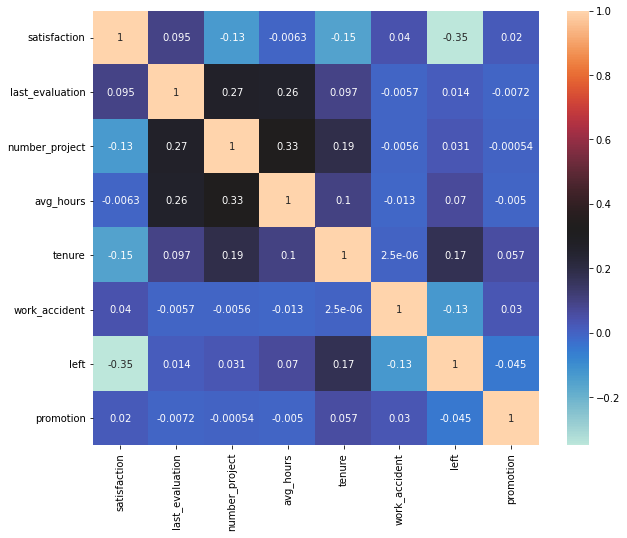

In [17]:
# Creating a correlation matrix
corr_matrix = data2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
annot = True,
cmap = 'icefire')

Text(0, 0.5, 'Employee Count')

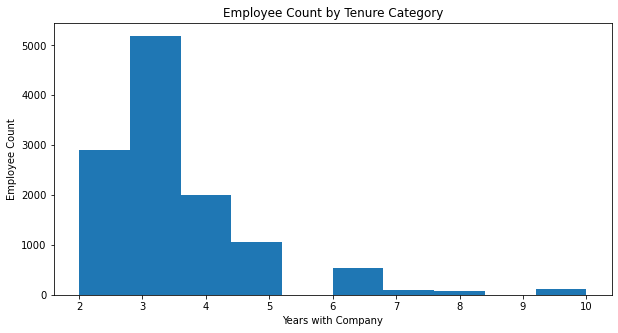

In [18]:
# Histogram to get an understanding of tenure
plt.figure(figsize=(10, 5))
plt.hist(data2['tenure'])
plt.title('Employee Count by Tenure Category')
plt.xlabel('Years with Company')
plt.ylabel('Employee Count')

Text(0, 0.5, 'Satisfaction Level')

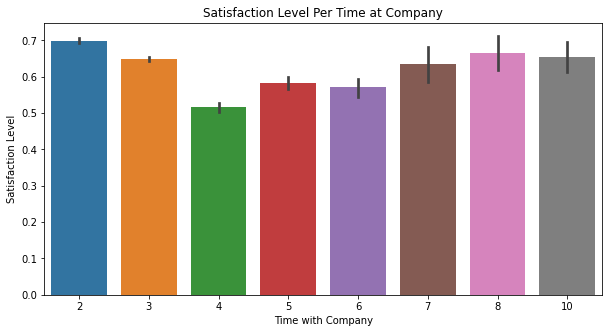

In [19]:
# Bar plot to understand satisfaction per time at the company
plt.figure(figsize=(10, 5))
sns.barplot(data = data2, x = 'tenure', y = 'satisfaction')
plt.title('Satisfaction Level Per Time at Company')
plt.xlabel('Time with Company')
plt.ylabel('Satisfaction Level')

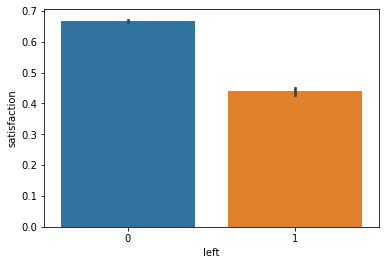

In [20]:
# Plotting the average safisfaction of people who left and stayed
sns.barplot(data = data2, x = 'left', y = 'satisfaction')


Text(0, 0.5, 'Satisfaction Level')

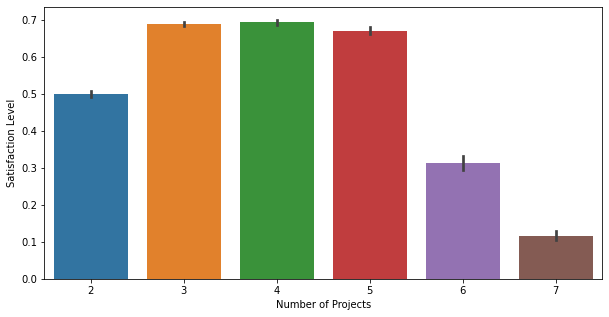

In [21]:
# Create barplot to see how number of projects effects satisfaction
plt.figure(figsize=(10, 5))
sns.barplot(data=data2, x='number_project', y='satisfaction')
plt.xlabel('Number of Projects')
plt.ylabel('Satisfaction Level')

Text(0, 0.5, 'Satisfaction Level')

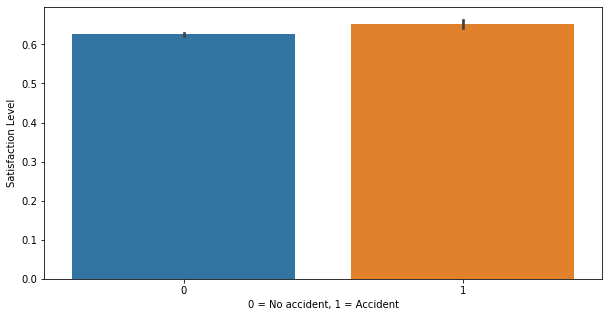

In [22]:
# Seeing how work accidents effect satisfaction
plt.figure(figsize=(10, 5))
sns.barplot(data=data2, x='work_accident', y='satisfaction')
plt.xlabel('0 = No accident, 1 = Accident')
plt.ylabel('Satisfaction Level')

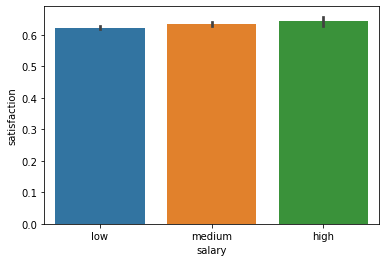

In [23]:
# How does salary effect satisfaction?
sns.barplot(data=data2, x='salary', y='satisfaction')


In [24]:
data2['hour_cat'] = pd.qcut(data2['avg_hours'],
                           6,
                           labels = ['96-133', '133-170', '170-208', '208-245', '245-282', '282-310'])

Text(0, 0.5, 'Satisfaction Level')

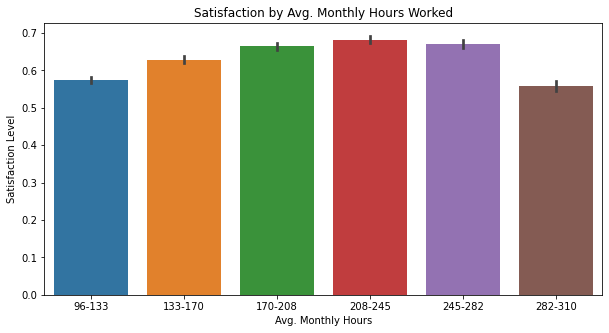

In [25]:
# Plotting satisfaction by average hours worked
plt.figure(figsize=(10, 5))
sns.barplot(data=data2, x='hour_cat', y='satisfaction')
plt.title('Satisfaction by Avg. Monthly Hours Worked')
plt.xlabel('Avg. Monthly Hours')
plt.ylabel('Satisfaction Level')

Text(0, 0.5, 'Avg. Monthly Hours Worked')

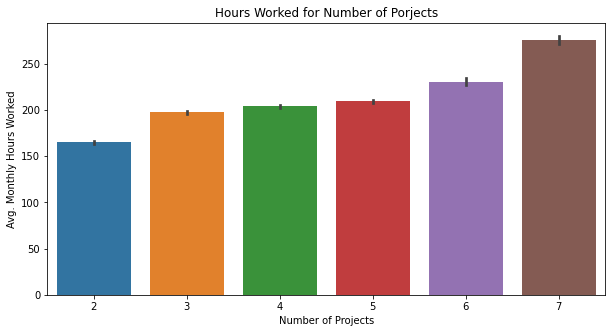

In [26]:
plt.figure(figsize=(10, 5))
sns.barplot(data=data2, x='number_project', y='avg_hours')
plt.title('Hours Worked for Number of Porjects')
plt.xlabel('Number of Projects')
plt.ylabel('Avg. Monthly Hours Worked')

### Insights

When exploring the data, that largest contributor to someone leaving is satisfaction. This may seem obvious, but what affects an employees satisfaction? Here is what I found during the highlevel EDA:
- Between year 4-5 with the company, satisfaction drops dramatically
- Satisfaction is at its highest (65-75%) when an employee has between 3-5 projects; however it drops dramatically (30%) when an employee has 6 projects, and even more (10%) when they are a part of 7 projects.
- Average monthly hours is obviously correlated to number of projects, but does not have as much of an affect on satisfaction as ones number of projects. However, the more projects one has the more hours they work and the less satisfied they are with their job.
- Things like salary, and work accidents typically do not effect an employees satisfaction level

#### Main Take-aways

It seems the largest contributor to an employee leaving the company is satisfaction.

The variable that seems to effect satisfaction the most, is workload. When an employee has above 3-5 projects, their satisfaction level drops dramatically.

Improving workload for employees, and ensuring they are not above a certain threshold can help to keep satisfaction and morale higher; directly effecting the likelyhood that they will leave the company.

## Model Creation

### Ethical Considerations
Not being able to predict an employees liklihood of leaving, means we will not be able to improve the job and lives of employees who are overworked and unhappy. When the model predicts someone might leave, it is likely steps will be taken to help improve that employees situation. That being said, ethically it is important to correctly identify unhappy employees. So I will be focusing on the recall score, to ensure that positive predictions are made often, and accurately.

### Type of Prediction Task

The goal is to build a model to predict if an employee is likely to leave. I will do this by training a classifier model to be able to predict if an employee's situation is similar to that of those to left the company; which will allow to company to focus on improving the employee's situation therefore improving the turnover rate.

### Model Type

I will be constructing an random forest model, a supervised ensemble of decision trees to be able to get the most accurate predictions.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [27]:
!pip install imbalanced-learn

     |████████████████████████████████| 257 kB 66.0 MB/s            
     |████████████████████████████████| 24.8 MB 104.5 MB/s            
     |████████████████████████████████| 302 kB 94.4 MB/s            
  Attempting uninstall: joblib
    Found existing installation: joblib 0.14.1
    Uninstalling joblib-0.14.1:
      Successfully uninstalled joblib-0.14.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [35]:
# Importing revelevant modeling packages
# Model Construction
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# To save the model
import pickle

In [29]:
# Defining functions for use in model creation

# Create make_results function
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )
  
    return table

# Create helper function to plot confusion matrix
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Returns a plot of confusion matrix for predictions on y data.
    ''' 
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
  
    disp.plot()
    plt.show()

### Feature Engineering

Before anything, I will start with feature engineering. Setting up the features to perform at their best within the model.

In [30]:
# Start by examining columns and dtypes
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   satisfaction     11991 non-null  float64 
 1   last_evaluation  11991 non-null  float64 
 2   number_project   11991 non-null  int64   
 3   avg_hours        11991 non-null  int64   
 4   tenure           11991 non-null  int64   
 5   work_accident    11991 non-null  int64   
 6   left             11991 non-null  int64   
 7   promotion        11991 non-null  int64   
 8   department       11991 non-null  object  
 9   salary           11991 non-null  object  
 10  hour_cat         11991 non-null  category
dtypes: category(1), float64(2), int64(6), object(2)
memory usage: 1.3+ MB


In [127]:
# Drop hour cat column
data3 = data2.drop('hour_cat', axis = 1).copy()

In [120]:
# Review class imbalance
data3['left'].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

In [129]:
# Seperate features into predictor and target variables (x and y)

# Encode variables
data4 = pd.get_dummies(data3)

# Define X variables
X = data4.copy()
X = X.drop('left', axis=1)

# Define y feature
y = data4['left']

# Create SMOTE object
smote = SMOTE(random_state = 0)

# Correct class imbalance
X_resampled, y_resampled = smote.fit_resample(X, y)

In [130]:
# Verify x samples

# Reviewing columns
X_resampled.head()

,satisfaction,last_evaluation,number_project,avg_hours,tenure,work_accident,promotion,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [38]:
# Checking shape
X_resampled.shape

(20000, 26)

In [39]:
# Verify y samples
print(y_resampled.value_counts(normalize = True) * 100)
print(y_resampled.shape)

1    50.0
0    50.0
Name: left, dtype: float64
(20000,)


In [40]:
# Split data into train, test, and validation data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state = 42)

That completes the feature engineering. I have cleaned the features, encoded, and oversampled to correct the class imbalance. Now I will begin the model construction.

### Model Construction

In [92]:
# Instantiate the model, GridSearch, and parameters/scoring objects

# Create parameters for GS
cv_params = {
  'n_estimators': [100, 200, 300],
  'max_depth': [3, 5, 8]
}

# Create scoring metrics
scoring = {'precision', 'recall', 'f1', 'accuracy'}

# Instantiate the model
rf = RandomForestClassifier(random_state = 0)

# Instantiate grid search
rf_cv = GridSearchCV(rf, cv_params, scoring = scoring, cv = 5, refit = 'recall')

In [94]:
%%time

# Fit the model
# rf_cv.fit(X_train, y_train)

CPU times: user 44.1 s, sys: 74.3 ms, total: 44.1 s
Wall time: 44.1 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, 8],
                         'n_estimators': [100, 200, 300]},
             refit='recall', scoring={'precision', 'f1', 'accuracy', 'recall'})

In [95]:
# Examine the best hyperparameters
rf_cv.best_params_

{'max_depth': 8, 'n_estimators': 100}

In [97]:
# Create dict with best parameters
best_params = {
  'n_estimators': [8],
  'max_depth': [100]
}

# Instantiate model with best parameters
rf_opt = rf_cv = GridSearchCV(rf, best_params, scoring = scoring, cv = 5, refit = 'recall')


In [98]:
# Fit the model
# rf_opt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [100], 'n_estimators': [8]},
             refit='recall', scoring={'precision', 'f1', 'accuracy', 'recall'})

In [99]:
# Pickle the model

# Importing directory package
import os

# Define file name
model_filename = 'capstone_rf_model.pkl'

# Get notebook directory
current_dir = os.getcwd()

# Create the path to the model file
model_path = os.path.join(current_dir, model_filename)

# Pickle the model
with open(model_path, 'wb') as f:
    pickle.dump(rf_opt, f)

In [100]:
# Read back in pickled model
with open(model_path, 'rb') as f:
    # Load model back into a variable
    model = pickle.load(f)

# Since model is pickled I commented out fitting the model

In [101]:
# Examine best score (f1 as defined in prefit=)
rf_opt.best_score_

0.9519372631129983

In [102]:
# Create a table with model results, using predefined function
rf_results = make_results('RandomForest CV', rf_opt)

# Viewing the results
rf_results

,Model,F1,Recall,Precision,Accuracy
0,RandomForest CV,0.969436,0.951937,0.987616,0.969867


In [107]:
# Predict on test data
rf_cv_preds = rf_opt.predict(X_test)

# Print the evaluation metrics for prediction performance
print('F1 score final RF model: ', round(f1_score(y_test, rf_cv_preds) *100, 2))
print('Recall score final RF model: ', round(recall_score(y_test, rf_cv_preds) * 100, 2))
print('Precision score final RF model: ', round(precision_score(y_test, rf_cv_preds) * 100, 2))
print('Accuracy score final RF model: ', round(accuracy_score(y_test, rf_cv_preds) * 100, 2))

F1 score final RF model:  96.42
Recall score final RF model:  94.33
Precision score final RF model:  98.6
Accuracy score final RF model:  96.54


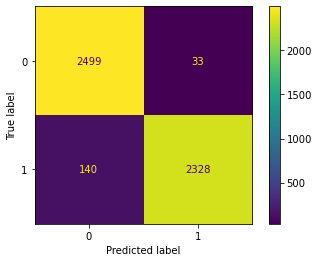

In [106]:
# Create a confusion matrix using predefined function
conf_matrix_plot(rf_opt, X_test, y_test)

In [109]:
# Fit final model now that I have gotten the evaluation metrics
rf_final = RandomForestClassifier(random_state = 0, n_estimators = 8, max_depth = 100)

# rf_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, n_estimators=8, random_state=0)

In [110]:
# Pickle the model

# Importing directory package
import os

# Define file name
model_filename = 'capstone_rf_final.pkl'

# Get notebook directory
current_dir = os.getcwd()

# Create the path to the model file
model_path = os.path.join(current_dir, model_filename)

# Pickle the model
with open(model_path, 'wb') as f:
    pickle.dump(rf_final, f)

In [111]:
# Read back in pickled model
with open(model_path, 'rb') as f:
    # Load model back into a variable
    rf_final = pickle.load(f)

# Since model is pickled I commented out fitting the model

In [131]:
# Find feature importance
feature_importances = rf_final.feature_importances_
feature_names = X.columns.tolist()

# Sort together by feature importance in descending order
feature_importance_sorted = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Print feature names and importance scores
print("Feature Importances:")
for name, importance in feature_importance_sorted:
  print(f"{name}: {importance:.4f}")


Feature Importances:
satisfaction: 0.2593
tenure: 0.1963
avg_hours: 0.1533
last_evaluation: 0.1236
number_project: 0.0947
work_accident: 0.0302
salary_high: 0.0093
salary_medium: 0.0074
salary_low: 0.0058
department_sales: 0.0049
department_technical: 0.0039
department_RandD: 0.0038
department_support: 0.0033
department_IT: 0.0029
department_accounting: 0.0020
department_management: 0.0019
department_hr: 0.0019
department_product_mng: 0.0015
promotion: 0.0013
department_marketing: 0.0011


## Model Evaluation

### Breakdown

The top five most influential features that impact if someone will leave (in this order) are:
1. satisfaction: 0.2593
2. tenure: 0.1963
3. avg_hours: 0.1533
4. last_evaluation: 0.1236
5. number_project: 0.0947
This is very useful information. I think that a potential next step in improving the turn over rate, would be doing an employee survey to find out what personally affects an employees job satisfaction..

However we do see that hours worked, tenure, and number of projects also effect the overall likelihood someone will leave. These metrics can be used to identify (in combination with the model) individuals who are likely to leave. Focusing on figuring out what _really_ is effecting employee satisfaction, by asking the employees themselves, will be an important next step.

But based on the data we DO know that satisfaction drops dramatically with number of projects, and hours worked (see EDA plots). Because of this, outside of deploying the model the focus should be on identifying high workload indiviuduals and figuring out ways to help them; as well as preventing overworking certain employees. 

I also believe that these would be some important next steps for further understanding the situation:
- What department works the most?
- What salary range is working the most?
- Why are some individuals working on 7 products (satisfaction on 10%) and others working on 2?
- How can systems be improved to better support hard working employees, to not only prevent high turnover, but to improve the lives of devoted employees?

### Summary of Results

The model was built to focus on identifying individuals who are at risk of leaving the company. With that in mind, lets examine some results:

The total number of test predictions was **5,030**. Out of those 5,030 predictions the model:
- Acurrately predicted an employee was going to leave 2,328 times
- Acurrately predicted an employee was _not_ going to leave 2,499 times
- Falsely predicted an employee would leave, when they actually didn't, 33 times
- Falsely predicted an employee would stay, when they actually left, 140 times

Overall the model was very accurate, with a small margin of error (3.44%). I believe the best use case of this model, would be to _identify individuals who are not satisfied_, and find ways to better improve their experience. This model will be very helpful, but should also be used in conjunction with finding ways to better improve employee satisfaction overall. This is a huge step in the right direction; and if used correctly, the model will help to not only improve the current state of employee turnover, but also the lives of the individuals impacted by company culture.

## Recommendations

As mentioned prior, my recommedations are as follows:
1. To better understand what personally effects employee satisfaction, perform another survey focused on identifying what postively, and negatively effects employee satisfaction personally.
2. Use the model to identify 'high risk' individuals who are likely to leave, and approach those individuals to find ways to help improve their work situation.
3. Identify employees who are 'work horses', (more than 5 or more projects or an monthly average of 200 hours worked) and find ways to support those individuals.
4. Continue forward with analysis to better understand categories (sallary level, department, etc.) have higher levels of employees that are likely to leave/struggle with job satisfaction